Импортируем библиотеку

In [1]:
%%time
from TSEnsemble import utils, nn, arima

CPU times: total: 4.22 s
Wall time: 4.61 s


Преобразуем .csv файл в DataFrame, состоящий из 1 столбца со значениями <br> временного ряда (column) и индекса, содержащего даты (index).

In [2]:
%%time
path = "datasets\\GlobalTemperatures.csv"
dataset = utils.ts_from_csv(path, column = 1, index = 0)


CPU times: total: 15.6 ms
Wall time: 14 ms


Декомпозируем временной ряд на составляющие: тренд, сезонность, остатки.

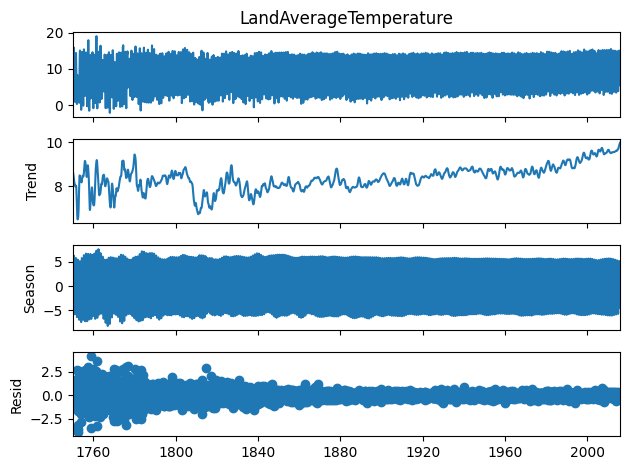

CPU times: total: 1.08 s
Wall time: 1.08 s


In [3]:
%%time
utils.plot_decompose(path, period = 12)

Строим функцию автокорелляции для временного ряда, по ней можно увидеть сезонность ряда.

CPU times: total: 31.2 ms
Wall time: 31.5 ms


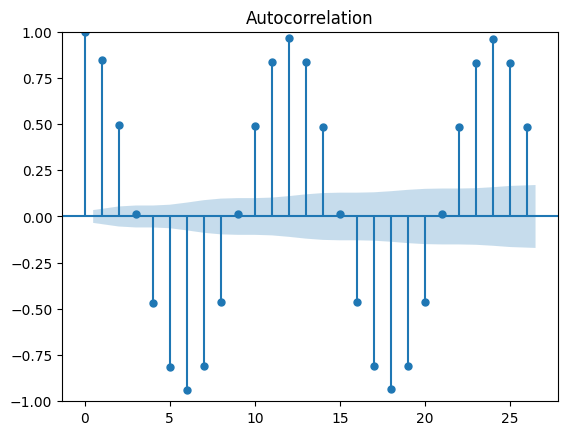

In [4]:
%%time
from statsmodels.graphics.tsaplots import plot_acf
utils.plot_acf(path, lags = 26)

Проверим ряд на стационарность, используя 2 теста: KPSS и ADF. <br> Также нарисуем график временного ряда, средних значений и стандартных<br> отклонений прошлых window значений (по умолчанию 2% датасета)

ADF test: 
 stat        -4.036404
pval         0.001231
lags        28.000000
numobs    3163.000000
1%          -3.432419
5%          -2.862454
10%         -2.567257
dtype: float64
KPSS test:  stat      1.409546
pval      0.010000
lags    149.000000
10%       0.347000
5%        0.463000
2.5%      0.574000
1%        0.739000
dtype: float64
CPU times: total: 344 ms
Wall time: 169 ms


C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:172: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)


False

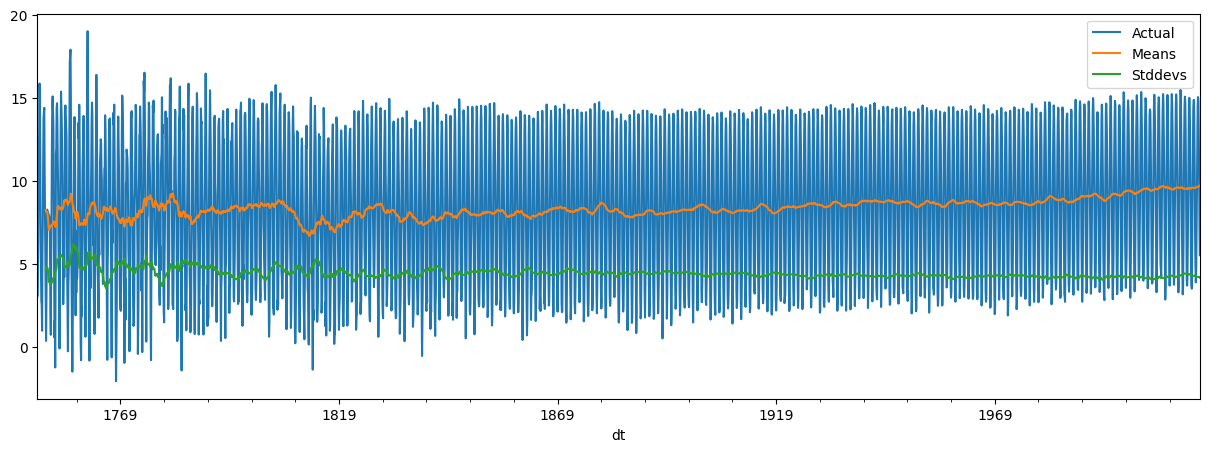

In [5]:
%%time
utils.isStationary(path, window = 24, plot = True)

Автоматически найдем наиболее оптимальные коэффициенты для SARIMA <br> модели по критерию AIC и построим модель.

C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)
C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  test_kpss = kpss(ts)


SARIMA[2, 1, 2] [1, 1, 1, 12] AIC:inf  Time_Taken:15.141
SARIMA[0, 1, 0] [0, 1, 0, 12] AIC:10102.140  Time_Taken:0.125
SARIMA[1, 1, 0] [1, 1, 0, 12] AIC:8882.128  Time_Taken:0.547
SARIMA[0, 1, 1] [0, 1, 1, 12] AIC:inf  Time_Taken:1.953
SARIMA[0, 1, 0] [1, 1, 0, 12] AIC:9272.559  Time_Taken:0.391
SARIMA[1, 1, 0] [0, 1, 0, 12] AIC:9669.414  Time_Taken:0.125
SARIMA[2, 1, 0] [1, 1, 0, 12] AIC:8767.364  Time_Taken:0.812
SARIMA[1, 1, 0] [1, 1, 0, 12] AIC:8882.128  Time_Taken:0.531
SARIMA[2, 1, 0] [0, 1, 0, 12] AIC:9564.930  Time_Taken:0.172
SARIMA[3, 1, 0] [1, 1, 0, 12] AIC:8696.185  Time_Taken:0.891
SARIMA[3, 1, 0] [0, 1, 0, 12] AIC:9506.098  Time_Taken:0.234
SARIMA[3, 1, 1] [1, 1, 0, 12] AIC:inf  Time_Taken:9.500
SARIMA[3, 1, 0] [2, 1, 0, 12] AIC:8451.195  Time_Taken:1.734
SARIMA[2, 1, 0] [2, 1, 0, 12] AIC:8519.633  Time_Taken:1.797
SARIMA[3, 1, 1] [2, 1, 0, 12] AIC:inf  Time_Taken:36.375
SARIMA[3, 1, 0] [3, 1, 0, 12] AIC:8250.504  Time_Taken:3.734
SARIMA[2, 1, 0] [3, 1, 0, 12] AIC:8322.14

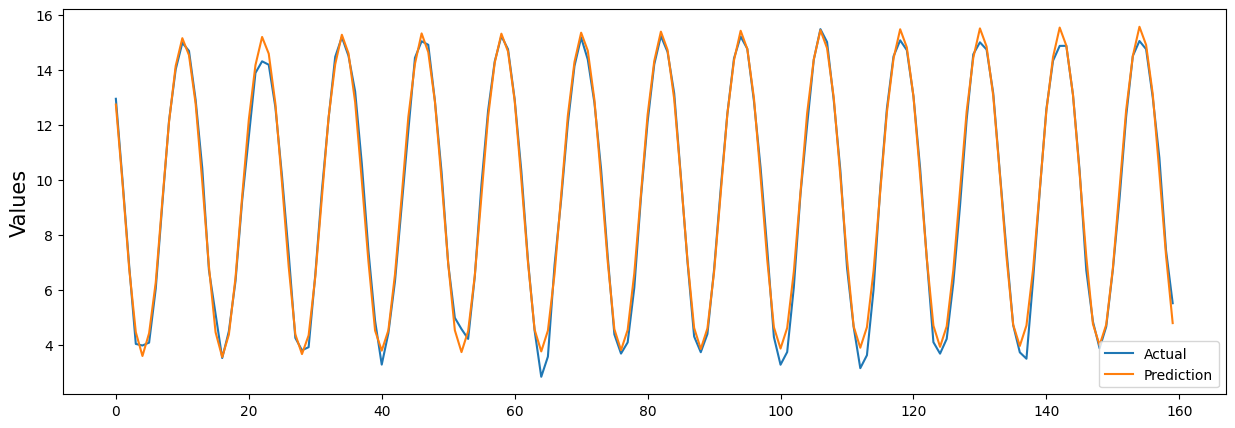

     prediction  actual
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
RMSE = 0.3516623745329281, MSE = 0.1236664256621374, MAE = 0.26352182083441456, MAPE = 0.042117482796404405
CPU times: total: 3min 46s
Wall time: 2min 38s


In [6]:
%%time
ar = arima.auto_arima(dataset,
                            method = 'stepwise',
                            season = 12,
                            max_p = 3,
                            max_q = 3,
                            max_Q = 3,
                            max_P = 3,
                            train_split = 0.95,
                            plot = True)

Построим CNN, LSTM, GRU, Transformer модели, пытаясь подобрать оптимальные параметры. 

5/5 [==============================] - 0s 1ms/step


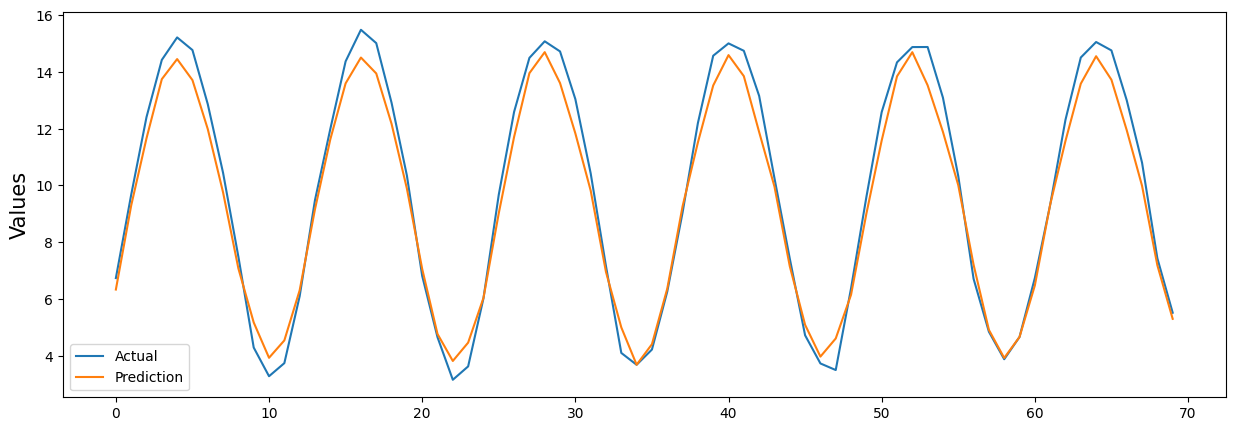

     prediction  actual
0     12.284866  12.950
1      9.820524   9.988
2      7.224907   6.892
3      5.042141   4.038
4      4.031034   3.981
..          ...     ...
155   13.722387  14.755
156   11.945464  12.999
157    9.986311  10.801
158    7.188808   7.433
159    5.302742   5.518

[160 rows x 2 columns]
RMSE = 0.6583594474273099, MSE = 0.43343716201679283, MAE = 0.5555038636977091, MAPE = 0.06782981773675922
CPU times: total: 4 s
Wall time: 3.33 s


In [7]:
%%time
cnn = nn.make_cnn(dataset,
                  look_back = 12,
                  hidden_layers = 1,
                  train_size = 0.95,
                  kernel_size = 2,
                  filters = 12,
                    epochs = 50,
                  batch_size = 64,
                  dilation_rate = 1,
                  dilation_mode = "additive")

5/5 [==============================] - 0s 3ms/step


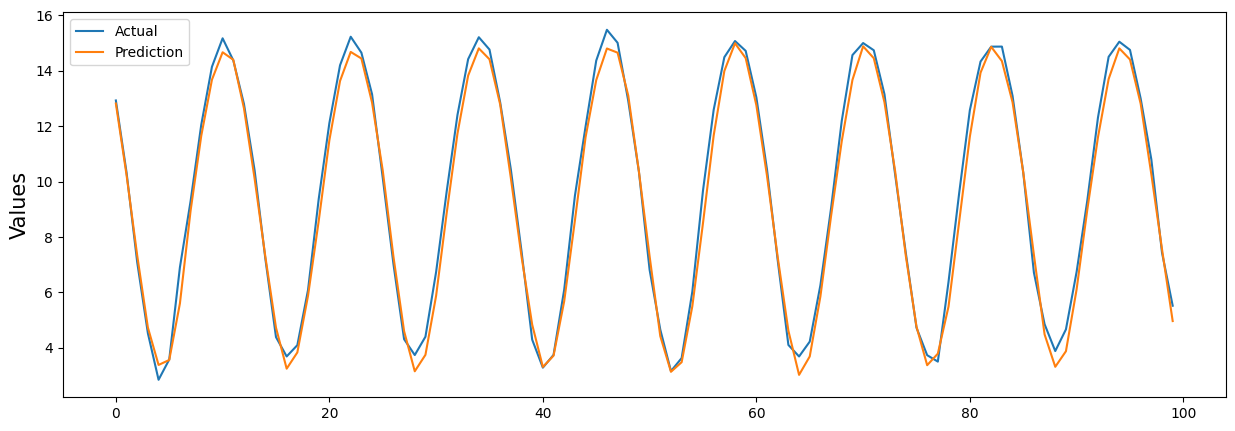

     prediction  actual
0     12.865595  12.950
1     10.289252   9.988
2      7.225205   6.892
3      4.602358   4.038
4      3.207160   3.981
..          ...     ...
155   14.408409  14.755
156   12.812637  12.999
157   10.264117  10.801
158    7.559187   7.433
159    4.964289   5.518

[160 rows x 2 columns]
RMSE = 0.5010783176531051, MSE = 0.25107948042206607, MAE = 0.41234805520232787, MAPE = 0.054083870649462205
CPU times: total: 44 s
Wall time: 20.4 s


In [8]:
%%time
lstm = nn.make_rnn(dataset,
                  look_back = 12,
                  units = 64,
                  hidden_layers = 1,
                  train_size = 0.95,
                  type = "LSTM",
                  epochs = 20,
                  batch_size = 16,
                  dropout = 0.0,
                  maxPlot = 100)

5/5 [==============================] - 0s 3ms/step


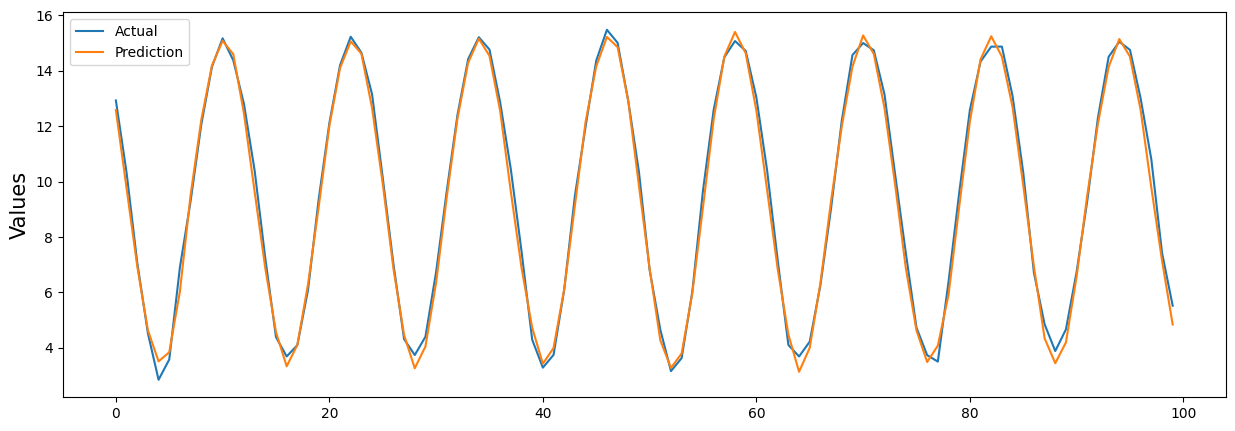

     prediction  actual
0     12.609927  12.950
1      9.816760   9.988
2      6.853143   6.892
3      4.517294   4.038
4      3.340159   3.981
..          ...     ...
155   14.511288  14.755
156   12.580152  12.999
157    9.779171  10.801
158    7.150233   7.433
159    4.838254   5.518

[160 rows x 2 columns]
RMSE = 0.3725310618266556, MSE = 0.13877939202569547, MAE = 0.30517440792718575, MAPE = 0.043223182635302046
CPU times: total: 52.7 s
Wall time: 23.1 s


In [9]:
%%time
gru = nn.make_rnn(dataset,
                  look_back = 12,
                  hidden_layers = 1,
                  units = 64,
                  train_size = 0.95,
                  type = "GRU",
                  dropout = 0.0,
                  maxPlot = 100)

5/5 [==============================] - 1s 39ms/step


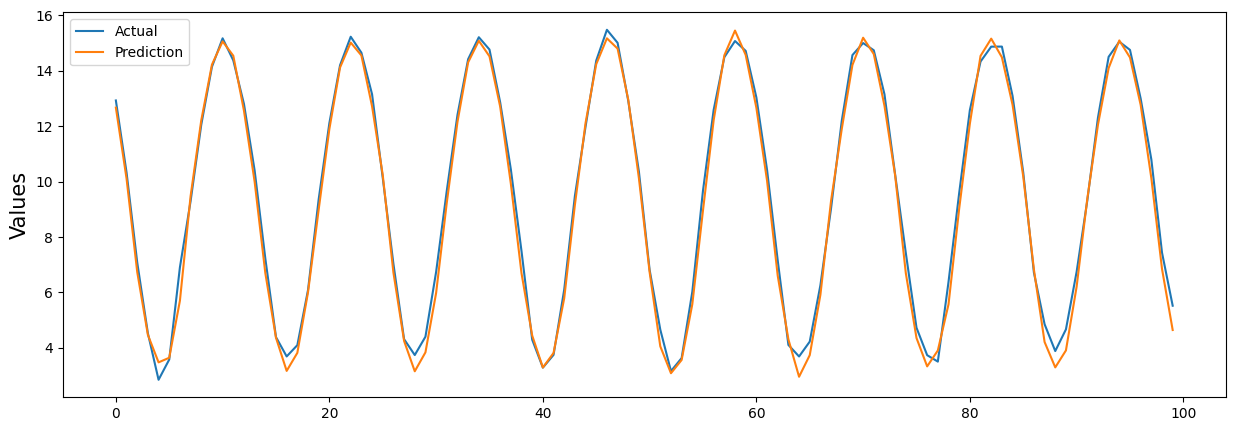

     prediction  actual
0     12.729177  12.950
1     10.105692   9.988
2      6.766570   6.892
3      4.316864   4.038
4      3.303991   3.981
..          ...     ...
155   14.480956  14.755
156   12.769287  12.999
157   10.125144  10.801
158    6.847308   7.433
159    4.640843   5.518

[160 rows x 2 columns]
RMSE = 0.4095406837460419, MSE = 0.16772357164317553, MAE = 0.3295308075587383, MAPE = 0.047884402345341005
CPU times: total: 13min 4s
Wall time: 4min 5s


In [10]:
%%time
transformer = nn.make_transformer(dataset, 
                    look_back = 12, 
                    train_size = 0.95,
                    maxPlot = 100, 
                    batch_size = 32,
                    epochs = 30,
                    verbose = 0,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

Построим acl модель.

AIC:  8250.504306275288
5/5 [==============================] - 1s 37ms/step


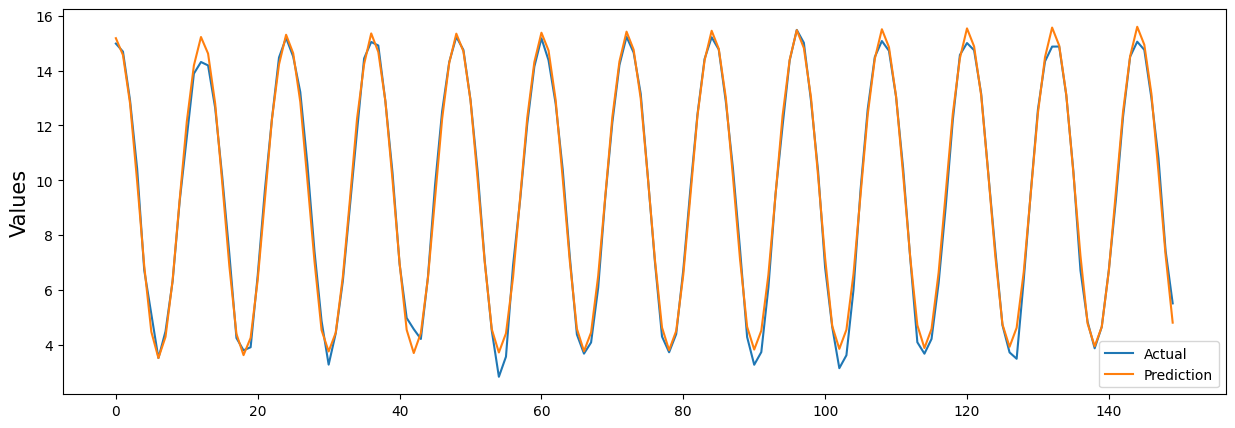

     prediction  actual
0     12.772660  12.950
1      9.924830   9.988
2      6.808712   6.892
3      4.484411   4.038
4      3.554079   3.981
..          ...     ...
155   14.940591  14.755
156   13.151231  12.999
157   10.290985  10.801
158    7.275015   7.433
159    4.815195   5.518

[160 rows x 2 columns]
RMSE = 0.33452303536559375, MSE = 0.11190566119021028, MAE = 0.25039790265463757, MAPE = 0.03935708739579258
CPU times: total: 17min 2s
Wall time: 6min 38s


In [35]:
%%time
acl = nn.ACL()
acl = acl.fit(dataset,
              order = (3, 1, 0), 
              seasonal_order = (3, 1, 0, 12), 
              look_back = 12,
              train_size= 0.95, 
              filters = 64, 
              cnn_layers = 1, 
              dilation_mode = "multiplicative", 
              lstm_layers = 1,
              units = 64, 
              kernel_size = 2, 
              epochs = 20)


Сгенерируем ненатреннированные модели с уже подобранными параметрами,<br> и создаздим ансамблевую модель, которая будет метамодель <br> SVR.

model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.4007127537775077 

5/5 [==============================] - 0s 3ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.35647500920921255 

5/5 [==============================] - 0s 32ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.38588934266258407 



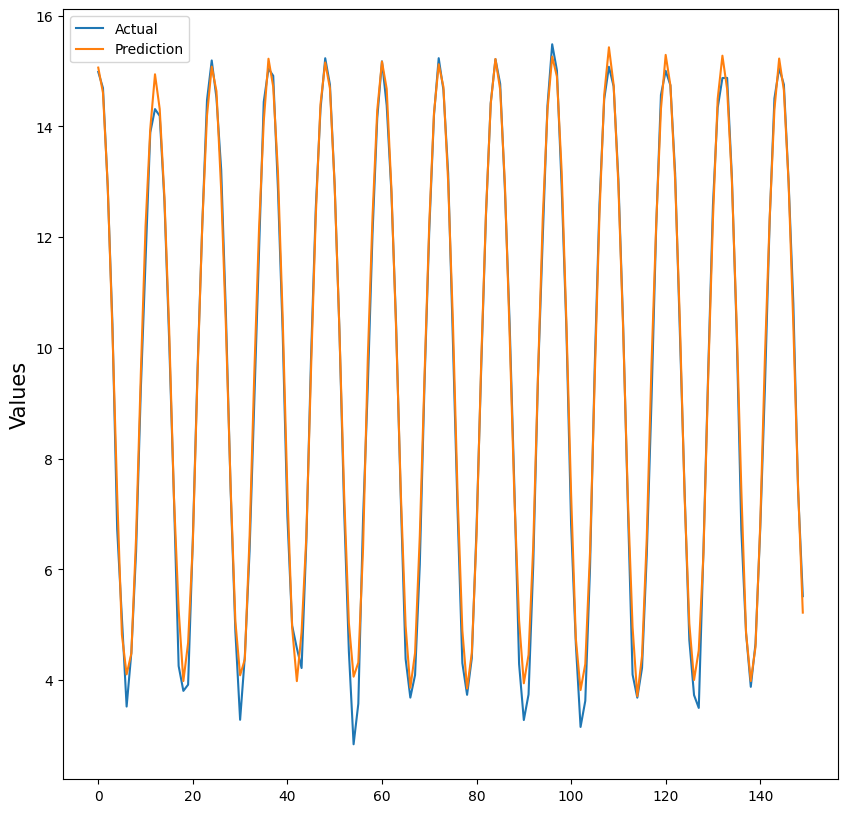

     prediction  actual
0     12.961977  12.950
1     10.349581   9.988
2      7.272380   6.892
3      4.871513   4.038
4      3.874902   3.981
..          ...     ...
155   14.649982  14.755
156   12.971047  12.999
157   10.406283  10.801
158    7.482579   7.433
159    5.220586   5.518

[160 rows x 2 columns]
RMSE = 0.36121391164003036, MSE = 0.13047548996229166, MAE = 0.2647144703991831, MAPE = 0.045329585337602965
CPU times: total: 6min 24s
Wall time: 2min 43s


0.36121391164003036

In [28]:
%%time
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(dataset, order = (3, 1, 0), seasonal_order = (3, 1, 0, 12))

transformer = nn.generate_transformer(
                    look_back = 12,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

lstm = nn.generate_rnn(look_back = 12,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

cnn = nn.generate_cnn(look_back = 12,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")
from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'svr')
ensemble_model.fit(dataset, 
                   train_size = 0.9505, 
                   look_back = 12, 
                   val_size = 0.2, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 16, 
                   metric = "rmse")
ensemble_model.eval(get="rmse")


model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.40473120997787754 

5/5 [==============================] - 0s 3ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3594793071533239 

5/5 [==============================] - 0s 30ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.39227421658304407 



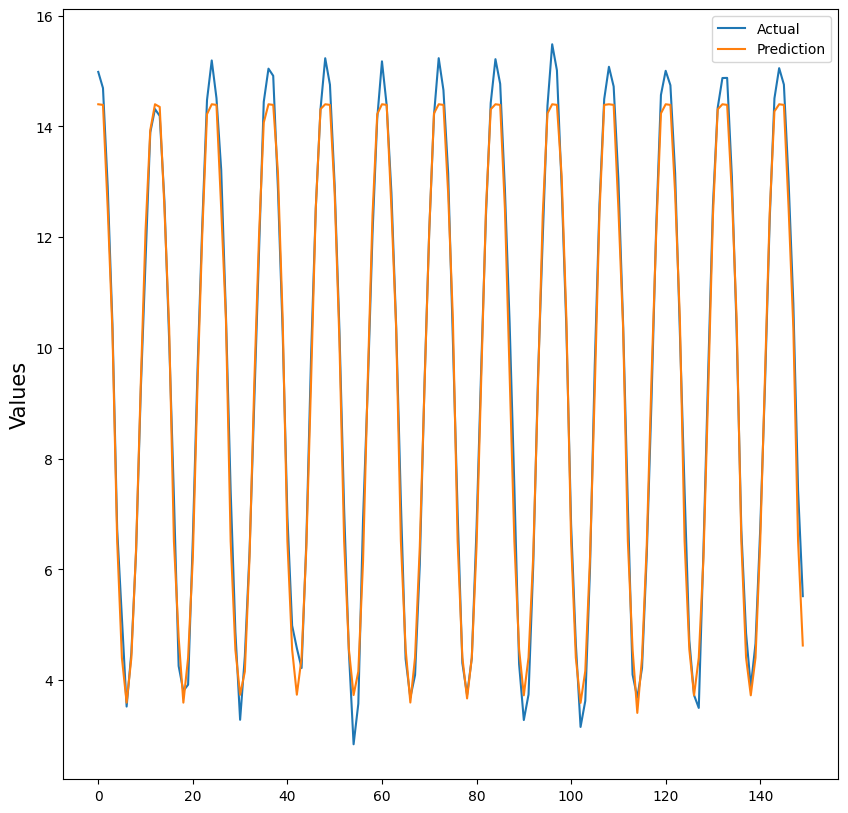

     prediction  actual
0     12.790126  12.950
1     10.521482   9.988
2      6.512626   6.892
3      4.550484   4.038
4      3.589247   3.981
..          ...     ...
155   14.387793  14.755
156   12.517095  12.999
157   10.359058  10.801
158    6.512626   7.433
159    4.626944   5.518

[160 rows x 2 columns]
RMSE = 0.42921084311732505, MSE = 0.18422194784948503, MAE = 0.3477685876601445, MAPE = 0.04757728580668437
CPU times: total: 29.3 s
Wall time: 23.8 s


0.42921084311732505

In [36]:
%%time
ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer],
                          regressor = 'catboost',
                          regr_params ={'task_type' : "GPU",
                                        'devices' : '0:1',
                                       'verbose': 0}
                         )
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.3, train_models_size = 0.6, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

Также построим CNN LSTM модель.

5/5 [==============================] - 0s 2ms/step


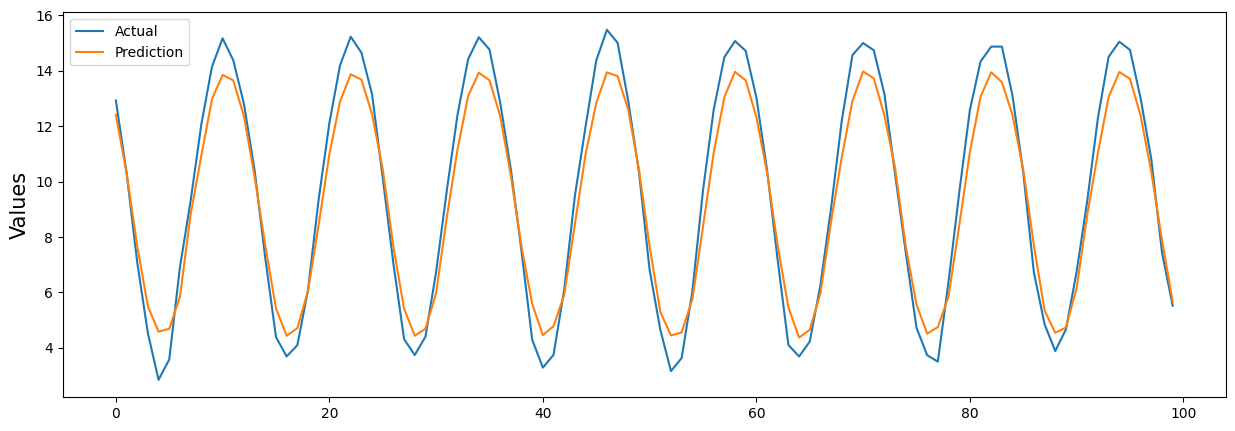

     prediction  actual
0     12.478696  12.950
1     10.274893   9.988
2      7.562572   6.892
3      5.357409   4.038
4      4.472935   3.981
..          ...     ...
155   13.709401  14.755
156   12.376742  12.999
157   10.339323  10.801
158    7.884968   7.433
159    5.672271   5.518

[160 rows x 2 columns]
RMSE = 0.9096950476877063, MSE = 0.8275450797875381, MAE = 0.8024150464953393, MAPE = 0.10389486417502884
CPU times: total: 34.5 s
Wall time: 16.2 s


In [19]:
%%time
seq = nn.make_seq_model(dataset, 
            layers = ["cnn", "lstm"], 
            look_back = 12, 
            units = 64,
            filters = 64,
            horizon = 1, 
            dropout = 0.0, 
            n_features = 1, 
            kernel_size = 2, 
            dilation_rate = 1, 
            dilation_mode = "multiplicative",
            optimizer = "Adam",
            loss = "mae",
            train_size = 0.95, 
            plot = True,
            batch_size = 16,
            epochs = 30,
            maxPlot = 100, 
            fig_size = (15, 5))

Построим предсказания на следующие n значений используя некоторые из моделей.

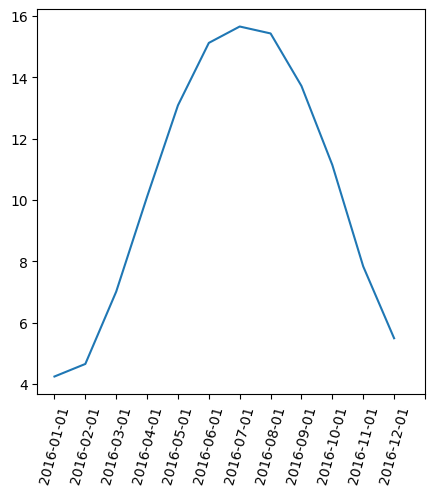

CPU times: total: 5.25 s
Wall time: 4.87 s


,predictions
2016-01-01,4.238867
2016-02-01,4.648934
2016-03-01,7.008116
2016-04-01,10.103488
2016-05-01,13.085192
2016-06-01,15.121956
2016-07-01,15.656098
2016-08-01,15.429897
2016-09-01,13.715979
2016-10-01,11.138085


In [37]:
%%time
acl.forecast(dataset, 12, fig_size = (5,5))

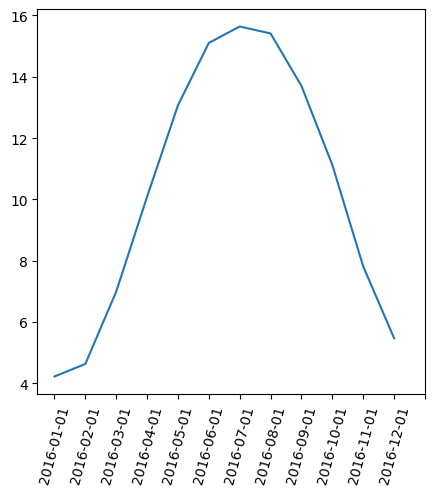

CPU times: total: 4.14 s
Wall time: 3.64 s


,predictions
2016-01-01,4.220717
2016-02-01,4.630549
2016-03-01,6.990239
2016-04-01,10.085731
2016-05-01,13.067435
2016-06-01,15.104198
2016-07-01,15.638341
2016-08-01,15.412140
2016-09-01,13.698222
2016-10-01,11.120328


In [38]:
%%time
utils.model_forecast(ar, dataset, 12, fig_size = (5,5))